In [5]:
from PIL import Image, ImageDraw
import os
from data import tile_mapping,connectable

def render_map(map_data, tile_mapping):
    tile_size = 100  # Assuming each tile is 100x100 pixels
    rows = len(map_data)
    cols = len(map_data[0])
    
    map_image = Image.new('RGBA', (cols * tile_size, rows * tile_size))
    draw = ImageDraw.Draw(map_image)

    for row in range(rows):
        for col in range(cols):
            tile_id = map_data[row][col]
            tile_info = tile_mapping[tile_id]
            tile_image_path = tile_info['image_path']
            tile_image = Image.open(tile_image_path)
            
          

            # Flip the image if necessary
            if tile_info['is_flipped']:
                tile_image = tile_image.transpose(Image.FLIP_LEFT_RIGHT)

            # Rotate the image
            rotation = tile_info['rotation'] * -90
            tile_image = tile_image.rotate(rotation, expand=True)

            # Paste the tile image into the map
            map_image.paste(tile_image, (col * tile_size, row * tile_size))
            # draw connection points as a circle inside the tile on the edge
            #  example 'connect_points': ['right', 'bottom', 'top']
            connect_points = tile_info.get('connect_points', [])
            for point in connect_points:
                if point == 'right':
                    draw.ellipse((col * tile_size + tile_size - 10, row * tile_size + tile_size//2 - 5, col * tile_size + tile_size, row * tile_size + tile_size//2 + 5), fill=(255, 0, 0, 255))
                if point == 'left':
                    draw.ellipse((col * tile_size, row * tile_size + tile_size//2 - 5, col * tile_size + 10, row * tile_size + tile_size//2 + 5), fill=(255, 0, 0, 255))
                if point == 'top':
                    draw.ellipse((col * tile_size + tile_size//2 - 5, row * tile_size, col * tile_size + tile_size//2 + 5, row * tile_size + 10), fill=(255, 0, 0, 255))
                if point == 'bottom':
                    draw.ellipse((col * tile_size + tile_size//2 - 5, row * tile_size + tile_size - 10, col * tile_size + tile_size//2 + 5, row * tile_size + tile_size), fill=(255, 0, 0, 255))

         
    # add grid lines
    for x in range(0, map_image.width, tile_size):
        draw.line((x, 0, x, map_image.height), fill=(0, 0, 0, 255))
    for y in range(0, map_image.height, tile_size):
        draw.line((0, y, map_image.width, y), fill=(0, 0, 0, 255))
    return map_image




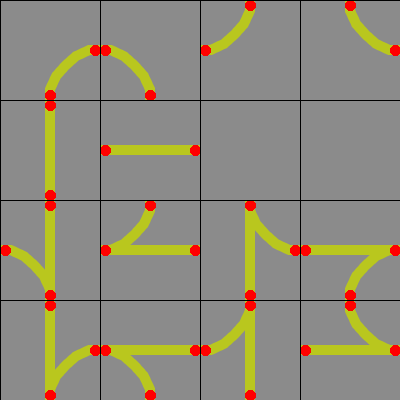

In [6]:
import matplotlib.pyplot as plt

# map_data = 4x4 from 1 to 14
map_data = [[1, 2, 3, 4],
            [5, 6,0,0],
            [ 7, 8, 9, 10],
            [11, 12,13, 14]]

render_map(map_data, tile_mapping)